# Aula 02

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_filme(n, figsize):
    plt.figure(figsize=figsize)
    
    notas_filmes = avaliacoes.query(f"filmeId=={n}")["nota"]
    media = round(notas_filmes.mean(), 2)
    plt.subplot(1,2,1).set_title(f'filmeId: {n} - média {media}')
    notas_filmes.plot(kind='hist')
    
    plt.subplot(1,2,2).set_title(f'filmeId: {n} - média {media}')
    notas_filmes.plot.box()
    plt.show()

In [3]:
filmes = pd.read_csv('filmes.csv')
avaliacoes = pd.read_csv('avaliacoes.csv')

In [4]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

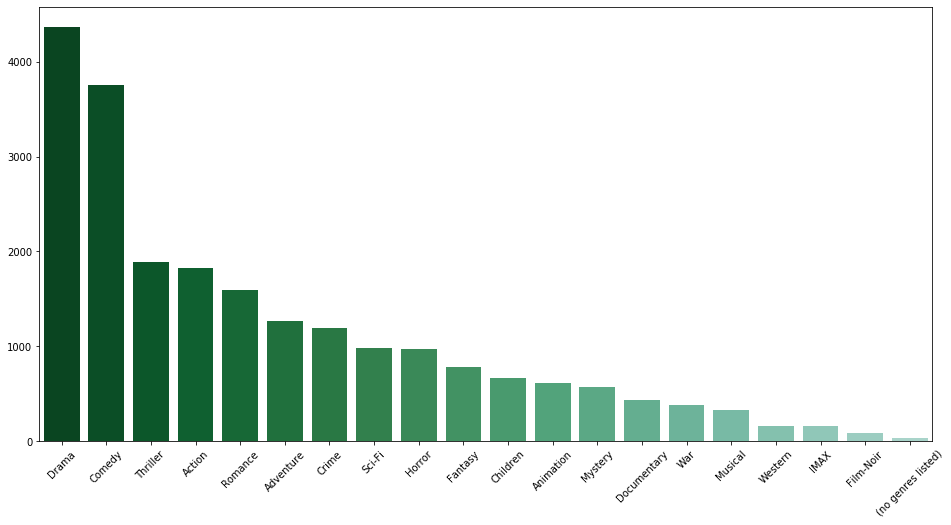

In [6]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
sns.barplot(
    x=filmes_por_genero.index,
    y=filmes_por_genero.values,
    palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 10)
)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [7]:
media_filmes = avaliacoes.groupby('filmeId').mean()['nota']
media_filmes.name = 'média'

### obtendo uma amostra uniforme

In [8]:
media_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: média, dtype: float64

In [9]:
len(media_filmes)

9724

In [10]:
sample_media_filmes = media_filmes.sample(500, random_state=int(len(media_filmes)/3))
sample_media_filmes.describe()

count    500.000000
mean       3.251269
std        0.867267
min        0.500000
25%        2.833333
50%        3.468985
75%        3.940090
max        5.000000
Name: média, dtype: float64

#### a amostra representa os dados originais, conforme comparação do describe() dos dataframes

In [11]:
filmes_com_media = filmes.join(media_filmes, on="filmeId")
sample = filmes_com_media.query(f'filmeId in {list(sample_media_filmes.head(5).index)}')

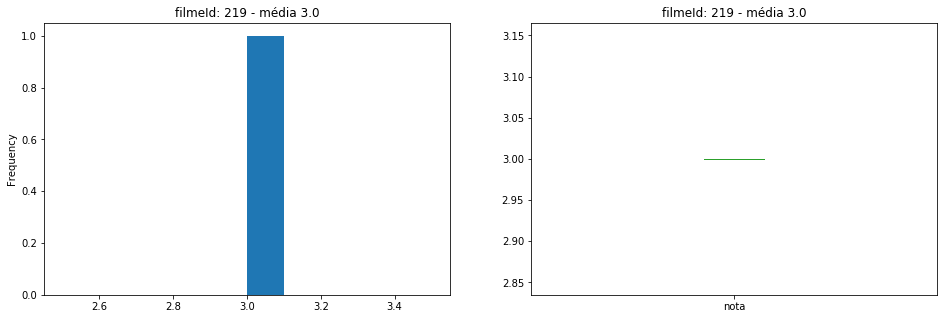

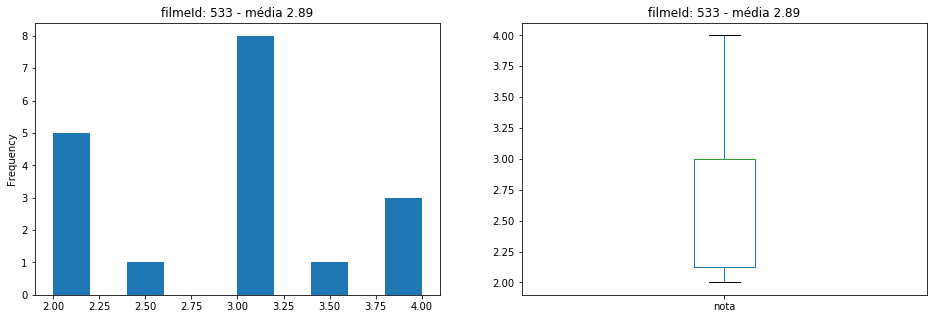

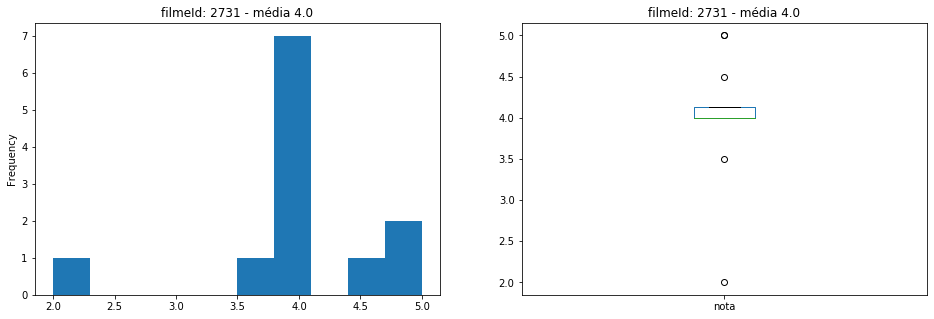

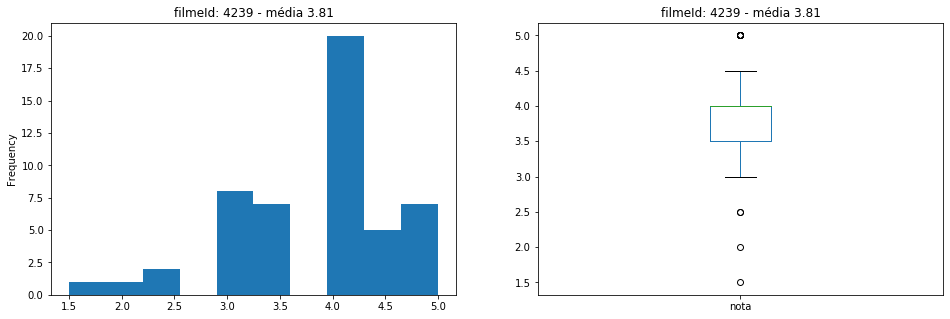

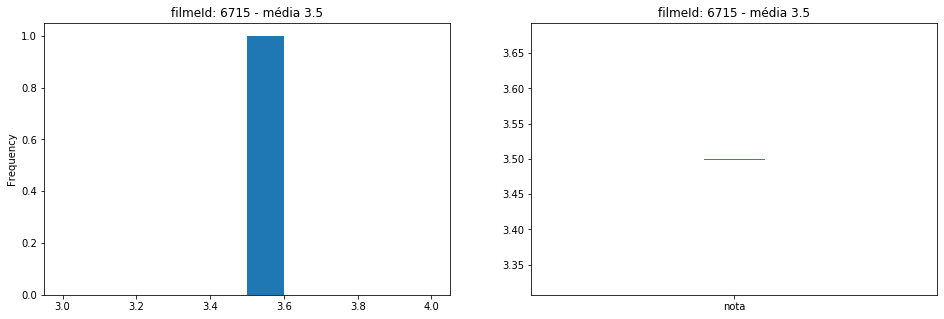

187     None
466     None
2052    None
3152    None
4531    None
dtype: object

In [12]:
sample.apply(lambda l: plot_filme(l['filmeId'], figsize=(16,5)), axis=1)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [13]:
votos_por_filme = avaliacoes['filmeId'].value_counts()
votos_por_filme.name = 'votos'

In [14]:
filmes_com_votos = filmes_com_media.join(votos_por_filme, on='filmeId', lsuffix='_left').sort_values('votos',ascending=False)
filmes_mais_votados = filmes_com_votos.head(10)
filmes_mais_votados

,filmeId,titulo,generos,média,votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


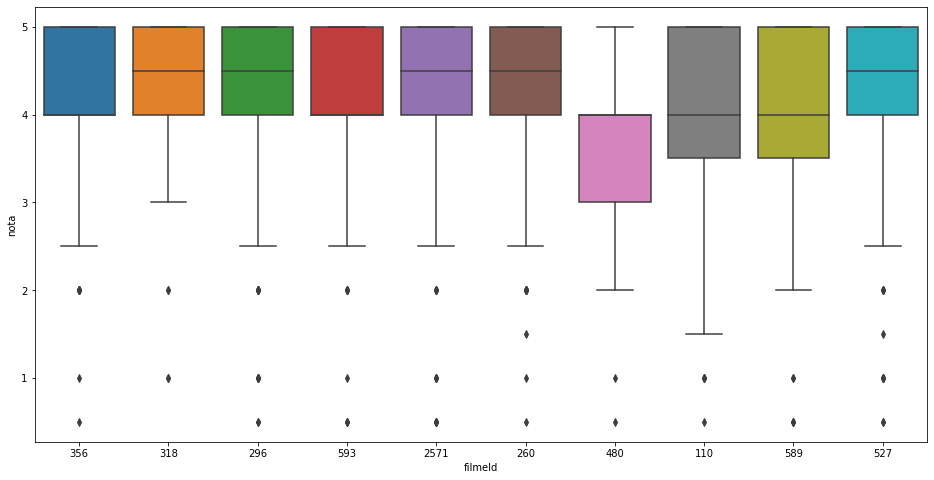

In [15]:
plt.figure(figsize=(16,8))
id_filmes = list(filmes_mais_votados['filmeId'].values)
sns.boxplot(
    data = avaliacoes.query(f"filmeId in {id_filmes}"),
    x='filmeId',
    y='nota',
    order = id_filmes
)
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

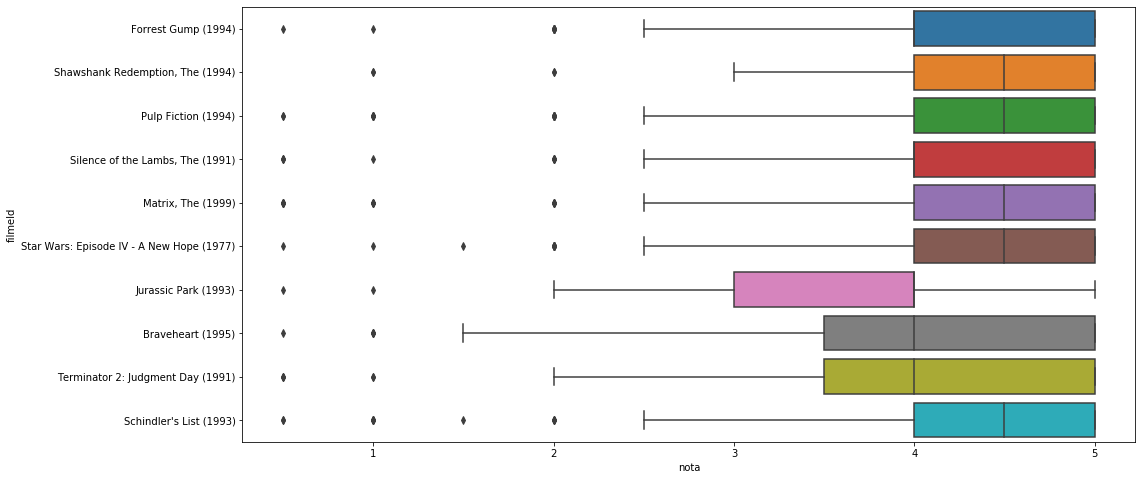

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(
    data = avaliacoes.query(f"filmeId in {id_filmes}"),
    x='nota',
    y='filmeId',
    order = id_filmes,
    orient='h'
).set_yticklabels(filmes_mais_votados['titulo'])
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [17]:
moda = avaliacoes.groupby("filmeId")["nota"].agg(pd.Series.mode).rename("moda")
mediana = avaliacoes.groupby("filmeId")["nota"].median().rename("mediana")

In [18]:
aux = filmes_com_media.join(moda, on=['filmeId'])
filmes_estat = aux.join(mediana, on=['filmeId'])
filmes_estat

,filmeId,titulo,generos,média,moda,mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,4,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3,3.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.5,3.5
9739,193585,Flint (2017),Drama,3.500000,3.5,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,3.5,3.5


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


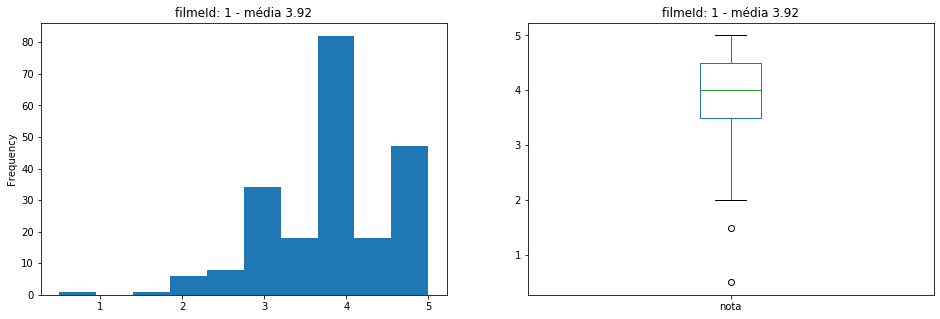

In [19]:
plot_filme(1, figsize=(16,5))

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [20]:
#filmes_com_media.query('titulo.str.contains("2006–2007")', engine='python')

In [21]:
#filmes_com_media.query('titulo.str.contains("OA")', engine='python')

In [106]:
anos = filmes_com_media['titulo'].str.extract(r'(\([\d]{4}\))')
anos.columns=['ano']

In [107]:
anos['ano'].unique()

array(['(1995)', '(1994)', '(1996)', '(1976)', '(1992)', '(1967)',
       '(1993)', '(1964)', '(1977)', '(1965)', '(1982)', '(1990)',
       '(1991)', '(1989)', '(1937)', '(1940)', '(1969)', '(1981)',
       '(1973)', '(1970)', '(1955)', '(1959)', '(1968)', '(1988)',
       '(1997)', '(1972)', '(1943)', '(1952)', '(1951)', '(1957)',
       '(1961)', '(1958)', '(1954)', '(1934)', '(1944)', '(1960)',
       '(1963)', '(1942)', '(1941)', '(1953)', '(1939)', '(1950)',
       '(1946)', '(1945)', '(1938)', '(1947)', '(1935)', '(1936)',
       '(1956)', '(1949)', '(1932)', '(1975)', '(1974)', '(1971)',
       '(1979)', '(1987)', '(1986)', '(1980)', '(1978)', '(1985)',
       '(1966)', '(1962)', '(1983)', '(1984)', '(1948)', '(1933)',
       '(1931)', '(1922)', '(1998)', '(1929)', '(1930)', '(1927)',
       '(1928)', '(1999)', '(2000)', '(1926)', '(1919)', '(1921)',
       '(1925)', '(1923)', '(2001)', '(2002)', '(2003)', '(1920)',
       '(1915)', '(1924)', '(2004)', '(1916)', '(1917)', '(200

In [108]:
filmes_com_anos = filmes_com_media.join(anos).dropna()

In [109]:
filmes_com_anos['ano'] = [int(str(ano).replace('(','').replace(')','')) for ano in filmes_com_anos['ano']]

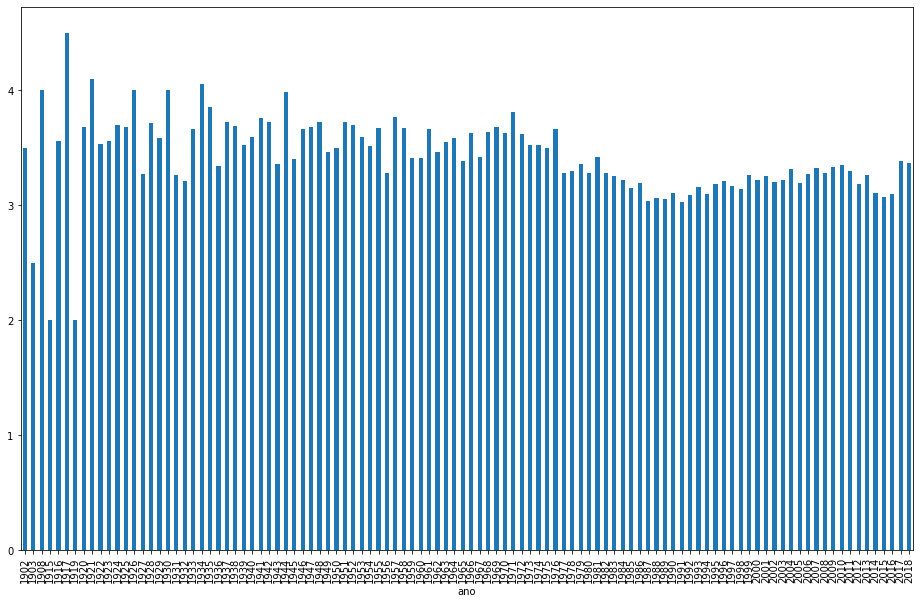

In [132]:
plt.figure(figsize=(16,10))
filmes_com_anos.groupby("ano")["média"].mean().round(2).plot(kind='bar')

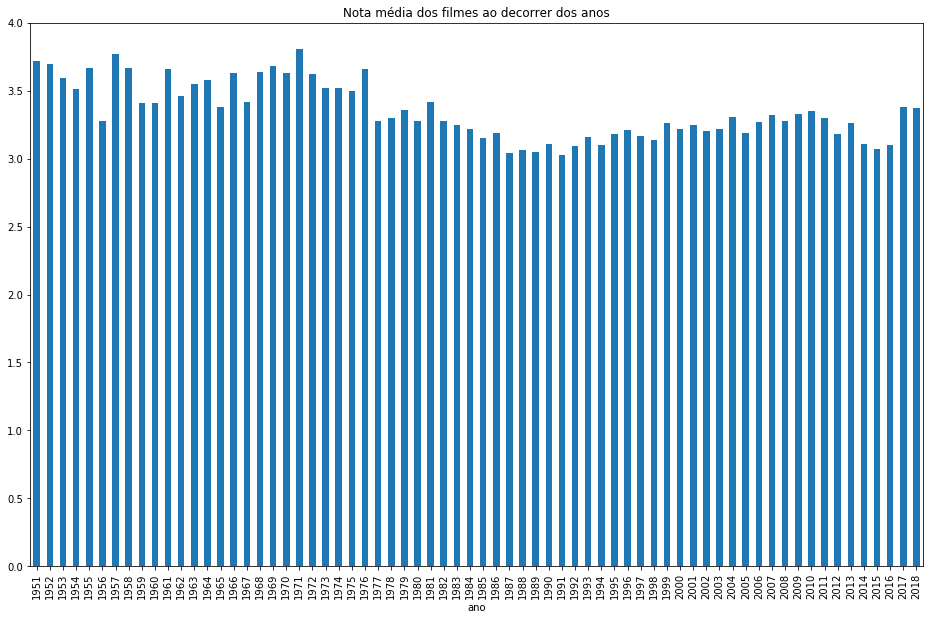

In [134]:
plt.figure(figsize=(16,10))
filmes_com_anos[filmes_com_anos['ano'] > 1950].groupby("ano")["média"].mean().round(2).plot(kind='bar')
plt.title('Nota média dos filmes ao decorrer dos anos')
plt.show()